## Final Project Submission

Please fill out:
* Student name:  jenyl murdock
* Student pace: self paced / part time / full time:  part time
* Scheduled project review date/time: 
* Instructor name:  Jacob Eli Thomas
* Blog post URL:


# Introduction

Deep learning is used in this project to solve a genre classification problem based on specific features related to music.

### How does deep learning work?
A deep learning model is designed to continually analyze data with a logic structure similar to how a human would draw conclusions. To achieve this, deep learning applications use a layered structure of algorithms called an artificial neural network. The design of an artificial neural network is inspired by the biological neural network of the human brain, leading to a process of learning that’s far more capable than that of standard machine learning models.  https://www.zendesk.com/blog/machine-learning-and-deep-learning/

# Objective

To categorize a piece of music to a specific genre by training a machine learning model using the various musical features of each entry.

# The Process

### This project will be utilizing the OSEMN data science process

* O - Obtain
* S - Scrub
* E - Explore
* M - Model
* N - Interpret

#### The following link explains this data science process:

https://towardsdatascience.com/5-steps-of-a-data-science-project-lifecycle-26c50372b492

# The Dataset

### The data for this project is 'Music Features' from kaggle
https://www.kaggle.com/insiyeah/musicfeatures

### The following information is taken from the description section of this data set on kaggle

### Context:  
A music genre is a conventional category that identifies pieces of music as belonging to a shared tradition or set of conventions. It is to be distinguished from musical form and musical style. The features extracted from these waves can help the machine distinguish between them.

### Content:  
The features in this dataset are extracted from the dataset provided here which consists of 1000 audio tracks each 30 seconds long. It contains 10 genres, each represented by 100 tracks. The tracks are all 22050Hz Mono 16-bit audio files in .wav format. The code used to extract features is at this GitHub repo. Features are extracted using libROSA library.

### Acknowledgements:  
The credits to this dataset go to MARSYAS.

### Inspiration:  
Due to the artistic nature of music, the classifications are often arbitrary and controversial, and some genres may overlap. Train a model and know to which genre your favourite piece of music belong to.


# Import the Data and Gather Data Information

In [1]:
# import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# read the data file
# print out the shape (#rows, #columns), and the first 5 rows of the data

data = pd.read_csv('data.csv')
print ('shape of the data -', data.shape)

data.head()

shape of the data - (1000, 30)


,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [3]:
# look at the entries at the end of the data

data.tail()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,...,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,...,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,...,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,...,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock
999,rock.00066.au,75.999540,36,0.360098,0.042995,2209.357588,2175.214294,4575.588999,0.107147,-245.160921,...,0.813777,-13.018359,0.053168,-8.232851,1.059255,-8.031864,-0.397097,-4.349921,-4.220998,rock


In [4]:
# Print the column names
# The filename column is not needed so it can be dropped
# The label column is our y or target variable so it needs to be removed the features

features = list(data.columns)

features.remove('filename')
features.remove('label')

print(features)

['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']


## Column Definitions

### Tempo:
The speed of the rhythm of a composition. Tempo is measured according to beats per minute. A very fast tempo, prestissimo, has between 200 and 208 beats per minute, presto has 168 to 200 beats per minute, allegro has between 120 and 168 beats per minute, moderato has 108 to 120 beats per minute, andante has 76 to 108, adagio has 66 to 76, larghetto has 60 to 66, and largo, the slowest tempo, has 40 to 60. means the speed at which a piece of music is played. sometimes the exact tempo is given at the beginning of a piece of music with the number of beats to a minute, as measured by a metronome. More often tempo indications give the performer more latitude, although the Hungarian composer Bela Bartok, for example, gives exact timings, often of each section of a work. in much earlier music the tempo is implicit in the notation or in the type of music.

The speed of the rhythm or song.

The rate of speed of a musical composition.

The speed of the beat in music. Tempo may be expressed in general terms (slow, fast, warp-speed) or in beats per minute

The rate at which the music moves measured in Beats Per Minute (how many steady even pulses there are in the music per minute).
https://musicterms.artopium.com/t/Tempo.htm

### Beat:

A beat is what gives music its rhythmic pattern; it can be regular or irregular. https://www.liveabout.com/the-elements-of-music-2455913

The regular pulse of music which may be dictated by the rise or fall of the hand or baton of the conductor, by a metronome, or by the accents in music. See conducting patterns.A throbbing that is heard when two tones are slightly out of tune. The English term for mordent, an embellishment consisting of the principal note and the note below it, resembling a short trill.The steady pulse of music. Beats form the basis of sense of musical time.(1) the pronounced rhythm of music; (2) one single stroke of a rhythmic accent.The beat or pulse in a piece of music is the regular rhythmic pattern of the music. Each bar should start with a strong beat and each bar should end with a weak beat. These may be known as the down-beat (strong, at the beginning of a bar) and the up-beat (weak, at the end of a bar). Up and down describe the gestures of a conductor, whose preparatory up-beat is of even greater importance to players than his down-beat.
The steady pulse of music. Beats form the basis of sense of musical time
https://musicterms.artopium.com/b/Beat.htm

### Chroma:

In music, the term chroma feature or chromagram closely relates to the twelve different pitch classes. Chroma-based features, which are also referred to as "pitch class profiles", are a powerful tool for analyzing music whose pitches can be meaningfully categorized (often into twelve categories) and whose tuning approximates to the equal-tempered scale. One main property of chroma features is that they capture harmonic and melodic characteristics of music, while being robust to changes in timbre and instrumentation.

Applications:  
Identifying pitches that differ by an octave, chroma features show a high degree of robustness to variations in timbre and closely correlate to the musical aspect of harmony. This is the reason why chroma features are a well-established tool for processing and analyzing music data.[2] For example, basically every chord recognition procedure relies on some kind of chroma representation.[3][4][5][6] Also, chroma features have become the de facto standard for tasks such as music alignment and synchronization[7][8] as well as audio structure analysis.[9] Finally, chroma features have turned out to be a powerful mid-level feature representation in content-based audio retrieval such as cover song identification[10][11] or audio matching.[12][13]

https://en.wikipedia.org/wiki/Chroma_feature

### RMSE:
Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/statistics-definitions/

### Spectral Centroid:
#### Explanation from John Byrd, CEO, Gigantic Software; Director, Sega; Sr Manager, Electronic Arts; Harvard '91

Think of notes in your favorite song. Some are high, some are low; some are loud, some are soft.
Make a list of all the notes on a piano keyboard. Call that your scale.
Pick out each note of the song.
For each note, choose two numbers: one number representing how high the note is, and one number representing how loud it is.
Multiply those two numbers together and save the result.
Do that for every note in the song.

Then take all those numbers you just saved and calculate the average of them. (Add all those numbers you saved, and divide them by the sum of all the note height numbers in the scale you created earlier.)
That average is the spectral centroid of the song.
It gives you an idea of how high or how low the song is. It takes into account how loud each note is, too.

You would expect a song with a high spectral centroid to have a lot of loud high notes in it. And a low spectral centroid indicates a bunch of low notes.

### Roll-Off:
The reduction of signal level as the frequency of the signal moves away from the cut-off frequency, especially when the cut-off rate is mild.
https://musicterms.artopium.com/r/Rolloff.htm

### Zero Crossing Rate:
Zero crossing rate of any signal frame is the rate at which a signal changes its sign during the frame. It denotes the number of times the signal changes value, from positive to negative and vice versa, divided by the total length of the frame.
https://www.sciencedirect.com/topics/engineering/zero-crossing-rate

### MFCC:
The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope. In MIR, it is often used to describe timbre.

For an indepth tutorial on mfcc go to http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/

In [5]:
# check the data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
filename              1000 non-null object
tempo                 1000 non-null float64
beats                 1000 non-null int64
chroma_stft           1000 non-null float64
rmse                  1000 non-null float64
spectral_centroid     1000 non-null float64
spectral_bandwidth    1000 non-null float64
rolloff               1000 non-null float64
zero_crossing_rate    1000 non-null float64
mfcc1                 1000 non-null float64
mfcc2                 1000 non-null float64
mfcc3                 1000 non-null float64
mfcc4                 1000 non-null float64
mfcc5                 1000 non-null float64
mfcc6                 1000 non-null float64
mfcc7                 1000 non-null float64
mfcc8                 1000 non-null float64
mfcc9                 1000 non-null float64
mfcc10                1000 non-null float64
mfcc11                1000 non-null float64
mfcc12           

In [6]:
# Summary of statistics for the numerical columns
data.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.601702,57.138000,0.378656,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479173,99.552199,...,-6.021121,4.471604,-4.797232,1.781547,-3.870275,1.147988,-3.967431,0.507303,-2.328779,-1.094875
std,28.297367,14.225728,0.081689,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235661,31.331904,...,6.819018,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561
min,54.978391,18.000000,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,...,-28.052265,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203
25%,99.384014,47.000000,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695133,76.811480,...,-10.966826,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194297,-2.003979,-4.670281,-3.368000
50%,117.453835,56.000000,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539,-120.206072,98.452551,...,-5.920161,3.891842,-4.199810,1.879424,-3.614473,1.211944,-4.059109,0.669788,-2.391261,-1.155198
75%,135.999178,65.250000,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895019,119.893638,...,-1.004241,9.706133,-0.161017,5.155264,-0.323536,4.350694,-0.842968,3.112518,0.149070,1.303739
max,234.907670,117.000000,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034587,193.096518,...,17.421038,23.037571,13.054333,18.161663,12.357588,13.468803,11.489994,15.379257,14.686910,15.368966


In [7]:
# check for any null values in the data

data.isnull().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

This data set doesn't contain any null values or special characters that require cleaning.

In [8]:
# list the unique values of the genres which is the target column

print ('genres:' , data['label'].unique())

genres: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


# Vizualizations of Data

## Initial Vizualization

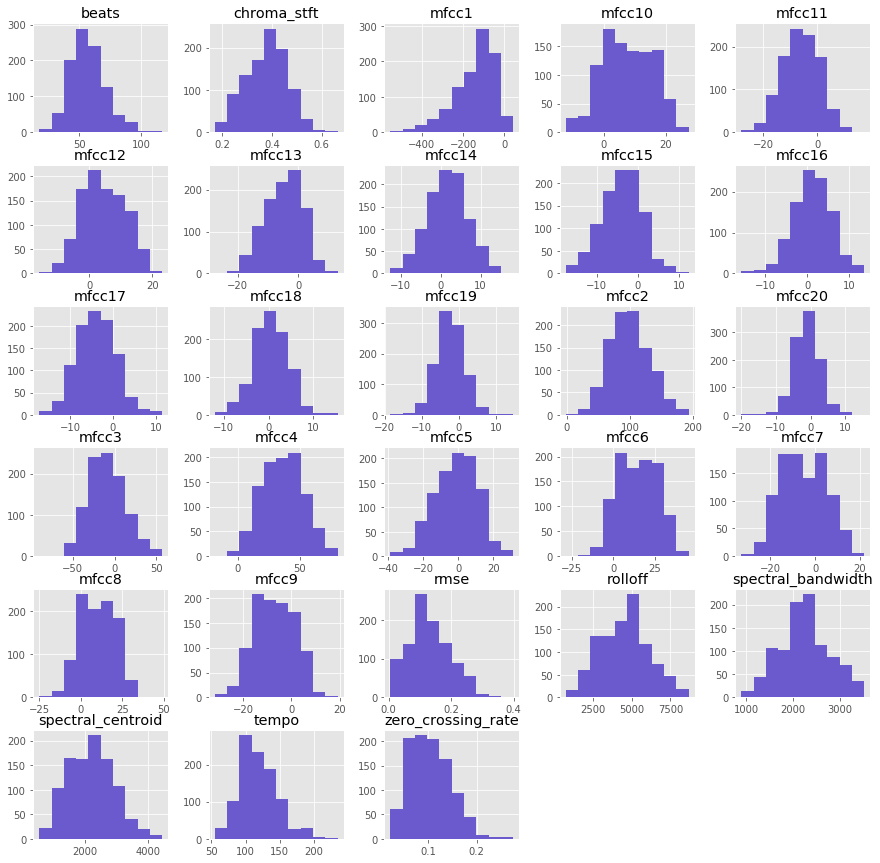

In [9]:
# Get an initial visualization of the data
# Note:  extra white space on either side of the graph indicates outliers

data.hist(figsize=(15,15), color = 'slateblue');

from the graphs, we can see that none of the features are categorical

## Graphs of Various Features

### 1  Genre Graph

Text(0.5, 1.0, 'Number of Entries per Genre')

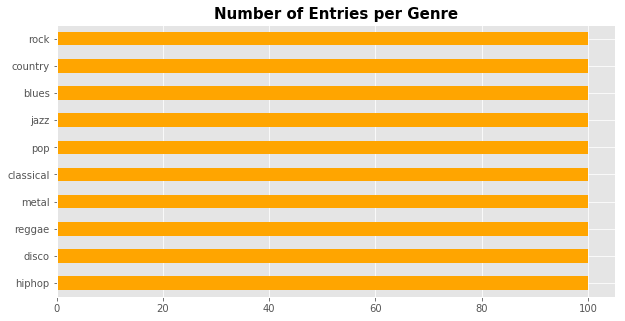

In [10]:
# number of entries per genre
genres = data['label'].value_counts()
genres = genres.sort_values(ascending=False)
genres.plot.barh(color='orange', figsize=(10,5))
plt.title('Number of Entries per Genre', fontsize=15, fontweight='bold')

For the 10 genres, we see that there are 100 entries of each

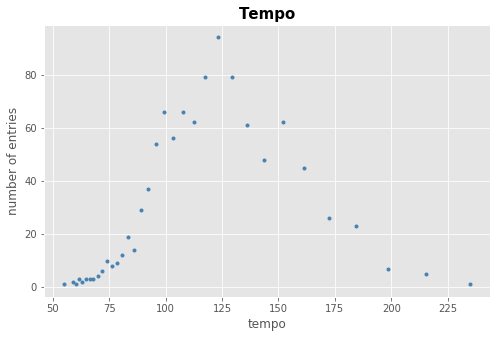

In [11]:
# graph of tempo
tempo = data['tempo'].value_counts().sort_index()
plt.xlabel('tempo')
plt.ylabel('number of entries')
plt.title('Tempo', fontsize=15, fontweight='bold')
tempo.plot(style=".", color='steelblue', figsize=(8,5))

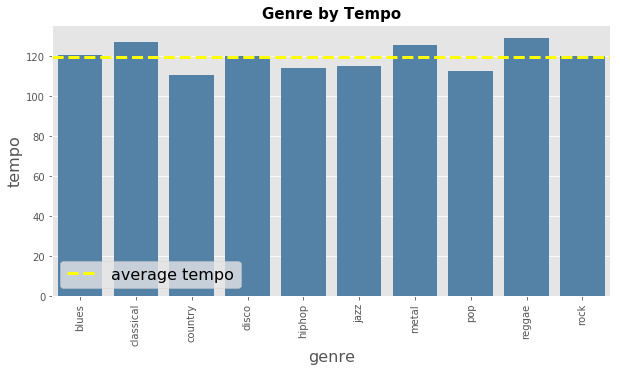

In [12]:
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(data['label'],data['tempo'], ci = False, color = 'steelblue')

# draw line for average home price
ax.axhline(y = data['tempo'].mean(), color = 'yellow', lw = 3, linestyle = '--', label = 'average tempo')

# rotate x-ticks to make it easier to read
plt.xticks(rotation = 90)
plt.title('Genre by Tempo', fontsize = 15, fontweight = 'bold')
plt.xlabel('genre', fontsize = 16)
plt.ylabel('tempo', fontsize = 16)
plt.legend(fontsize = 16)
plt.show()

We don't see much distinction between the genres with regards to tempo.  This makes sense since all genres include both slower and faster pieces of music.

### 3  Graphs of Beats 

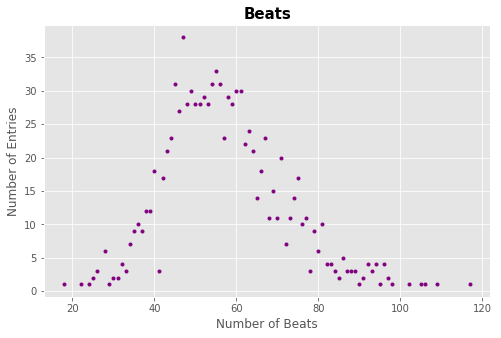

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

beats = data['beats'].value_counts().sort_index()
plt.xlabel('Number of Beats')
plt.ylabel('Number of Entries')
plt.title('Beats', fontsize=15, fontweight='bold')
beats.plot(style=".", color='purple', figsize=(8,5))

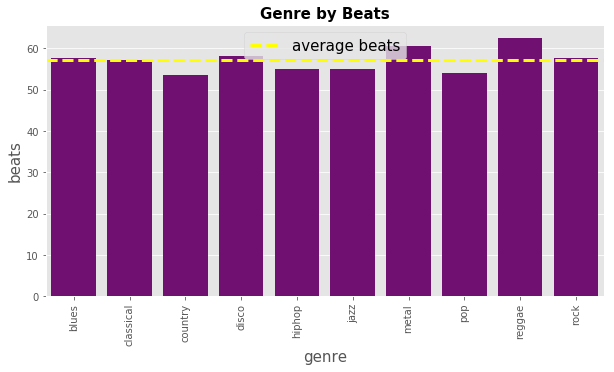

In [14]:
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(data['label'],data['beats'], ci = False, color = 'purple')

# draw line for average home price
ax.axhline(y = data['beats'].mean(), color = 'yellow', lw = 3, linestyle = '--', label = 'average beats')

# rotate x-ticks to make it easier to read
plt.xticks(rotation = 90)
plt.title('Genre by Beats', fontsize = 15, fontweight = 'bold')
plt.xlabel('genre', fontsize = 15)
plt.ylabel('beats', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()


Since beats is highly correlated to the tempo, the graphs look fairly similar and again, there is not much distinction between the different genres.

### 4  Chroma Graphs

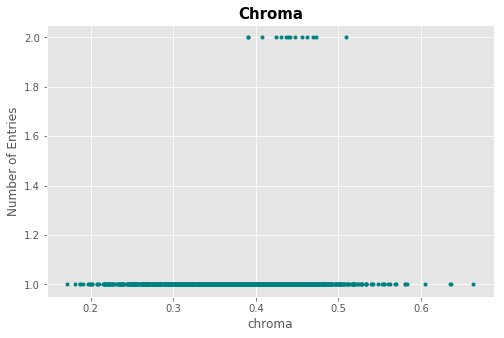

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

chroma = data['chroma_stft'].value_counts().sort_index()
plt.xlabel('chroma')
plt.ylabel('Number of Entries')
plt.title('Chroma', fontsize=15, fontweight='bold')
chroma.plot(style=".", color='teal', figsize=(8,5))

The scatter plot didn't give a good reflection of the data so let's group the chroma values into bins

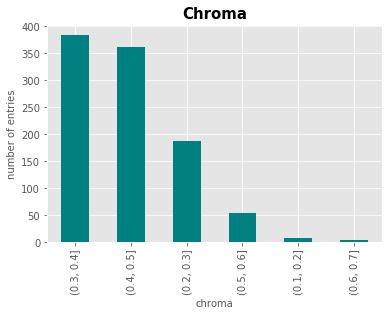

In [16]:
# create bins for chroma 

bins = [.1, .2, .3, .4, .5, .6 , .7]
bins_chroma = pd.cut(data['chroma_stft'], bins)

plt.xlabel('chroma', fontsize=10)
plt.ylabel('number of entries', fontsize=10)
plt.title('Chroma', fontsize=15, fontweight='bold')
bins_chroma.value_counts().plot(kind='bar', color = 'teal')

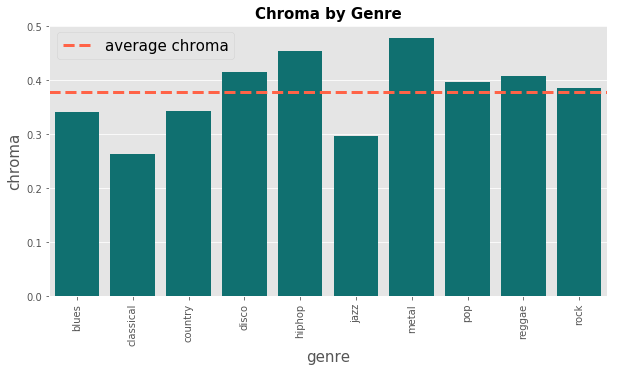

In [17]:
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(data['label'],data['chroma_stft'], ci = False, color = 'teal')

# draw line for average chroma
ax.axhline(y = data['chroma_stft'].mean(), color = 'tomato', lw = 3, linestyle = '--', label = 'average chroma')

# rotate x-ticks to make it easier to read
plt.xticks(rotation = 90)
plt.title('Chroma by Genre', fontsize = 15, fontweight = 'bold')
plt.xlabel('genre', fontsize = 15)
plt.ylabel('chroma', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()


Looking at the chroma, we start to see more of a differentiation between the genres. 

"Chroma-based features, which are also referred to as "pitch class profiles", are a powerful tool for analyzing music whose pitches can be meaningfully categorized (often into twelve categories) and whose tuning approximates to the equal-tempered scale." - see previous column description 

### 5  Spectral Centroid Graphs

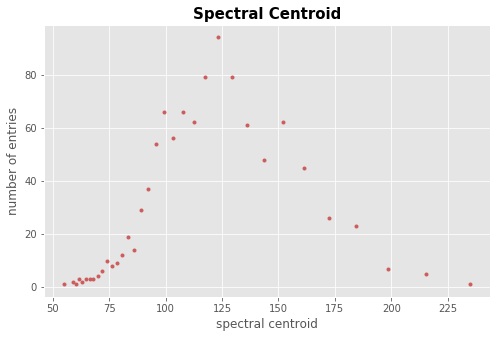

In [18]:
# graph of tempo
spec = data['spectral_centroid'].value_counts().sort_index()
plt.xlabel('spectral centroid')
plt.ylabel('number of entries')
plt.title('Spectral Centroid', fontsize=15, fontweight='bold')
tempo.plot(style=".", color='indianred', figsize=(8,5))

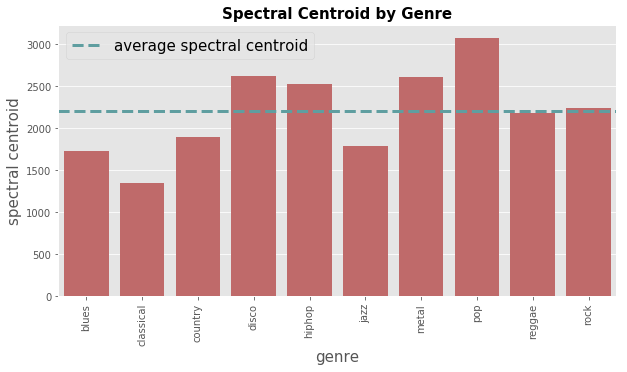

In [19]:
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(data['label'],data['spectral_centroid'], ci = False, color = 'indianred')

# draw line for average chroma
ax.axhline(y = data['spectral_centroid'].mean(), color = 'cadetblue', lw = 3, linestyle = '--', label = 'average spectral centroid')

# rotate x-ticks to make it easier to read
plt.xticks(rotation = 90)
plt.title('Spectral Centroid by Genre', fontsize = 15, fontweight = 'bold')
plt.xlabel('genre', fontsize = 15)
plt.ylabel('spectral centroid', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()


The spectral centroid gives you an idea of how high or how low the song is. It also takes into account how loud each note is. A song with a high spectral centroid will tend to have a lot of loud high notes in it, and a low spectral centroid indicates it will have more lower notes.
It is expected that disco, hiphop, metal and pop will generally have louder and higher notes than some of the other genres, which we can see in the graph.

### 6  Spectral Bandwidth Graph

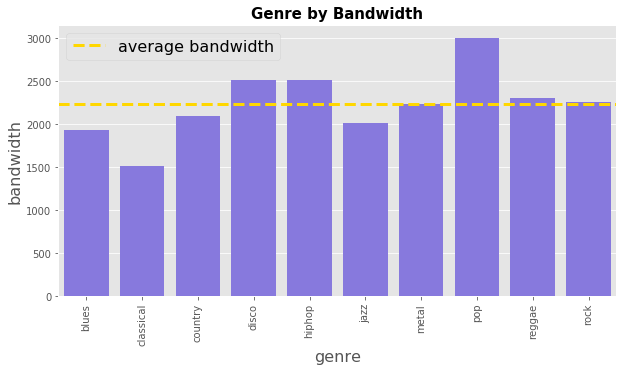

In [20]:
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(data['label'],data['spectral_bandwidth'], ci = False, color = 'mediumslateblue')

# draw line for average home price
ax.axhline(y = data['spectral_bandwidth'].mean(), color='gold', lw = 3, linestyle = '--', label = 'average bandwidth')

# rotate x-ticks to make it easier to read
plt.xticks(rotation = 90)
plt.title('Genre by Bandwidth', fontsize = 15, fontweight = 'bold')
plt.xlabel('genre', fontsize = 16)
plt.ylabel('bandwidth', fontsize = 16)
plt.legend(fontsize = 16)
plt.show()

Bandwidth is the difference between the upper and lower frequencies in a continuous band of frequencies. It is typically measured in hertz. There is a big difference between classical and pop, however, some of the other genres are very similar in their bandwidth values.

### 7 Rolloff Graph

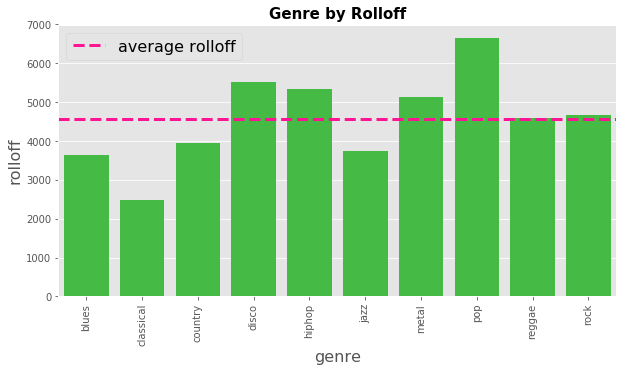

In [21]:
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(data['label'],data['rolloff'], ci = False, color = 'limegreen')

# draw line for average home price
ax.axhline(y = data['rolloff'].mean(), color = 'deeppink', lw = 3, linestyle = '--', label = 'average rolloff')

# rotate x-ticks to make it easier to read
plt.xticks(rotation = 90)
plt.title('Genre by Rolloff', fontsize = 15, fontweight = 'bold')
plt.xlabel('genre', fontsize = 16)
plt.ylabel('rolloff', fontsize = 16)
plt.legend(fontsize = 16)
plt.show()

Because there is a wider range with the rolloff scale, we can see a little more of a distinction between some of the genres with this feature. 

### 8  Zero Crossing Rate Graphs

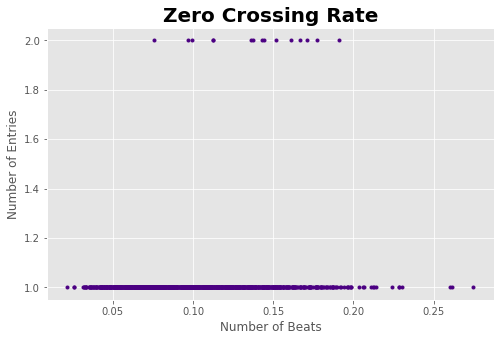

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

zero_x = data['zero_crossing_rate'].value_counts().sort_index()
plt.xlabel('Number of Beats')
plt.ylabel('Number of Entries')
plt.title('Zero Crossing Rate', fontsize=20, fontweight='bold')
zero_x.plot(style=".", color='indigo', figsize=(8,5))

again, we will need to bin the data to get a better look at it

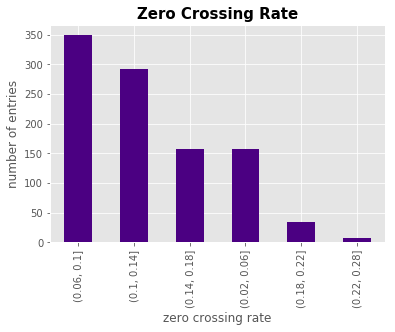

In [23]:
# create bins for zero crossing rate

bins = [.02, .06, .1, .14, .18, .22 , .28]
bins_zero = pd.cut(data['zero_crossing_rate'], bins)

plt.xlabel('zero crossing rate')
plt.ylabel('number of entries')
plt.title('Zero Crossing Rate', fontsize=15, fontweight='bold')
bins_zero.value_counts().plot(kind='bar', color = 'indigo')

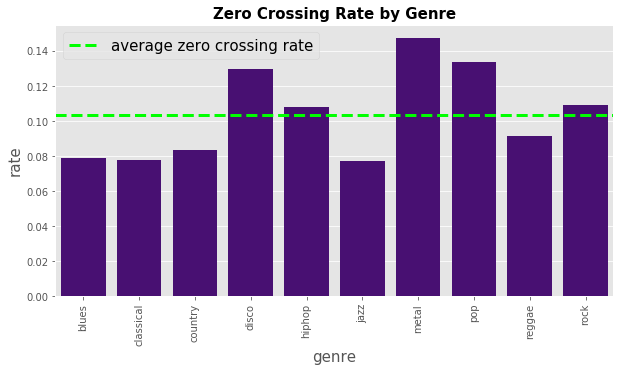

In [24]:
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(data['label'],data['zero_crossing_rate'], ci = False, color = 'indigo')

# draw line for average zero crossing rate
ax.axhline(y = data['zero_crossing_rate'].mean(), color = 'lime', lw = 3, linestyle = '--', label = 'average zero crossing rate')

# rotate x-ticks to make it easier to read
plt.xticks(rotation = 90)
plt.title('Zero Crossing Rate by Genre', fontsize = 15, fontweight = 'bold')
plt.xlabel('genre', fontsize = 15)
plt.ylabel('rate', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()


In this graph, disco, metal and pop have a higher rate of the audio signal changing signs between positive and negative.

The zero crossing rate basically shows the same genres above the average line as those in the spectral centroid graph. As we can see later in the heat map, these two features are highly correlated.

### 9 Mfcc Graphs

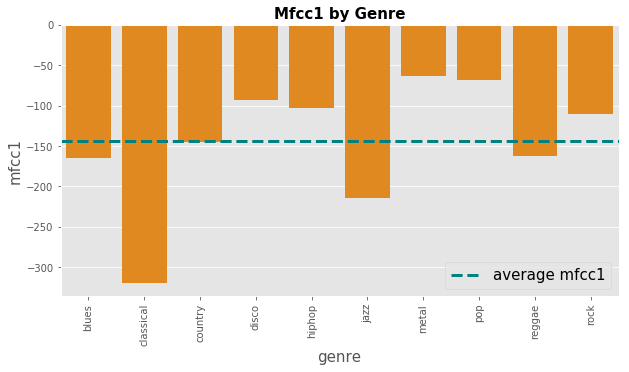

In [25]:
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(data['label'],data['mfcc1'], ci = False, color = 'darkorange')

# draw line for average zero crossing rate
ax.axhline(y = data['mfcc1'].mean(), color = 'teal', lw = 3, linestyle = '--', label = 'average mfcc1')

# rotate x-ticks to make it easier to read
plt.xticks(rotation = 90)
plt.title('Mfcc1 by Genre', fontsize = 15, fontweight = 'bold')
plt.xlabel('genre', fontsize = 15)
plt.ylabel('mfcc1', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()


With this particular feature of mfcc, classical and jazz are separated more from the others.
There are 20 of this type of feature so I will only graph a few.
Here is a reminder of what this feature is:
The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope. In MIR, it is often used to describe timbre.

Timbre, also known as tone color or tone quality, is the perceived sound quality of a musical note, sound or tone. Timbre distinguishes different types of sound production, such as choir voices and musical instruments, such as string instruments, wind instruments, and percussion instruments. Wikipedia

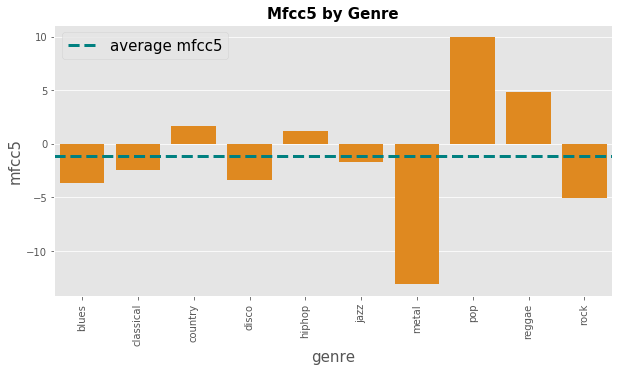

In [26]:
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(data['label'],data['mfcc5'], ci = False, color = 'darkorange')

# draw line for average zero crossing rate
ax.axhline(y = data['mfcc5'].mean(), color = 'teal', lw = 3, linestyle = '--', label = 'average mfcc5')

# rotate x-ticks to make it easier to read
plt.xticks(rotation = 90)
plt.title('Mfcc5 by Genre', fontsize = 15, fontweight = 'bold')
plt.xlabel('genre', fontsize = 15)
plt.ylabel('mfcc5', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()


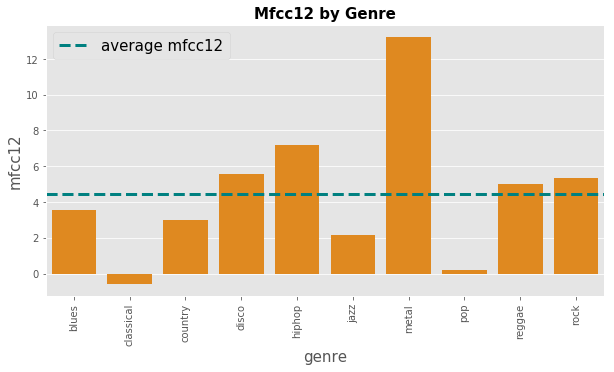

In [27]:
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(data['label'],data['mfcc12'], ci = False, color = 'darkorange')

# draw line for average zero crossing rate
ax.axhline(y = data['mfcc12'].mean(), color = 'teal', lw = 3, linestyle = '--', label = 'average mfcc12')

# rotate x-ticks to make it easier to read
plt.xticks(rotation = 90)
plt.title('Mfcc12 by Genre', fontsize = 15, fontweight = 'bold')
plt.xlabel('genre', fontsize = 15)
plt.ylabel('mfcc12', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

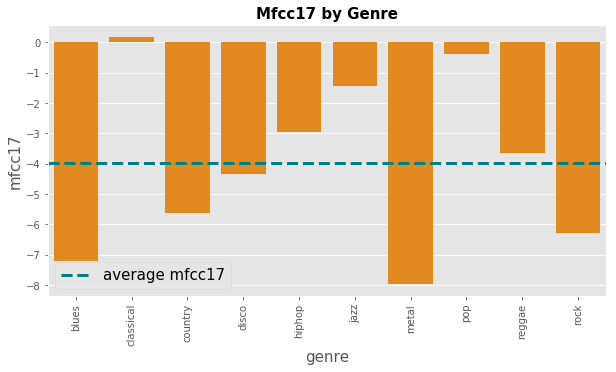

In [28]:
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(data['label'],data['mfcc17'], ci = False, color = 'darkorange')

# draw line for average zero crossing rate
ax.axhline(y = data['mfcc17'].mean(), color = 'teal', lw = 3, linestyle = '--', label = 'average mfcc17')

# rotate x-ticks to make it easier to read
plt.xticks(rotation = 90)
plt.title('Mfcc17 by Genre', fontsize = 15, fontweight = 'bold')
plt.xlabel('genre', fontsize = 15)
plt.ylabel('mfcc17', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

It appears that the various mfcc features are able to separate the genres a little more clearly than some of the other features.

## Heat Map Vizualization

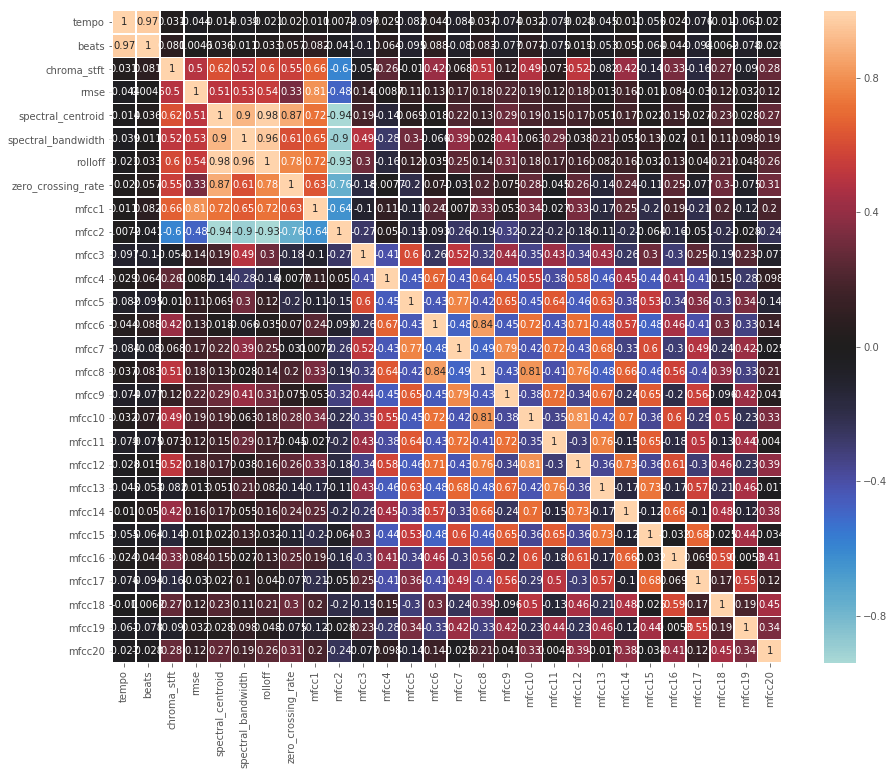

In [29]:
# Set up the matplotlib figure and generate a heatmap of the data
f, ax = plt.subplots(figsize=(15,12))

sns.heatmap(data.corr(), center = 0, linewidths = .4, annot=True);

#### The heatmap indicates that there is some very high correlation between some of the features.  
Rolloff has a high correlation with both spectral centroid and spectral bandwidth.  Tempo and beats are also strongly associated, which we would expect since tempo is a rate of beats per minute.

# Build Machine Learning Models

### Pre-process the data

### The code in the following 2 cells was adapted from:
https://www.kaggle.com/chadwickcasper/deep-music

In [30]:
data_by_genre = data.groupby('label')  # group data by genre
labels = list(data['label'].unique())  # list of genres
print ('labels:',labels)

# Group each genre by median value of feature
for feature in features:
    feat_groups = data_by_genre[feature]
    feat_median = [(group[0], group[1].median()) for group in list(feat_groups)]
    feat_med_by_group = sorted(feat_median, key=lambda x: x[1])
    feat_labels_ordered_by_median, ordered_medians = zip(*feat_med_by_group)

labels: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [31]:
# Encode the labels for genre - use LabelEncoder for target variable (label column)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_labels = pd.DataFrame(le.fit_transform(data['label']))
data['label'] = new_labels
print(data.head(3))

# for more information see documentation at: 
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

         filename       tempo  beats  chroma_stft      rmse  \
0  blues.00081.au  103.359375     50     0.380260  0.248262   
1  blues.00022.au   95.703125     44     0.306451  0.113475   
2  blues.00031.au  151.999081     75     0.253487  0.151571   

   spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0        2116.942959         1956.611056  4196.107960            0.127272   
1        1156.070496         1497.668176  2170.053545            0.058613   
2        1331.073970         1973.643437  2900.174130            0.042967   

        mfcc1  ...       mfcc12     mfcc13    mfcc14    mfcc15    mfcc16  \
0  -26.929785  ...    14.336612 -13.821769  7.562789 -6.181372  0.330165   
1 -233.860772  ...    -2.250578   3.959198  5.322555  0.812028 -1.107202   
2 -221.802549  ...   -13.037723 -12.652228 -1.821905 -7.260097 -6.660252   

      mfcc17     mfcc18     mfcc19     mfcc20  label  
0  -6.829571   0.965922  -7.570825   2.918987      0  
1  -4.556555  -2.436490

## I.  Logistic Regression Model

### Process:

* Normalization
* Define X and y
* Train-Test Split
* Fit a Model
* Predict
* Generate a Confusion Matrix
* Calculate Evaluation Metrics

### Step 1: Normalization

In [32]:
# Standardize the data ( from https://www.kaggle.com/chadwickcasper/deep-music)
from sklearn.preprocessing import scale

features_data = data[features]
print(data.head(3))

norm_df = pd.DataFrame(scale(features_data))
norm_df = norm_df.round(decimals=2)

print(norm_df.head(3))

         filename       tempo  beats  chroma_stft      rmse  \
0  blues.00081.au  103.359375     50     0.380260  0.248262   
1  blues.00022.au   95.703125     44     0.306451  0.113475   
2  blues.00031.au  151.999081     75     0.253487  0.151571   

   spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0        2116.942959         1956.611056  4196.107960            0.127272   
1        1156.070496         1497.668176  2170.053545            0.058613   
2        1331.073970         1973.643437  2900.174130            0.042967   

        mfcc1  ...       mfcc12     mfcc13    mfcc14    mfcc15    mfcc16  \
0  -26.929785  ...    14.336612 -13.821769  7.562789 -6.181372  0.330165   
1 -233.860772  ...    -2.250578   3.959198  5.322555  0.812028 -1.107202   
2 -221.802549  ...   -13.037723 -12.652228 -1.821905 -7.260097 -6.660252   

      mfcc17     mfcc18     mfcc19     mfcc20  label  
0  -6.829571   0.965922  -7.570825   2.918987      0  
1  -4.556555  -2.436490

In [33]:
# Combine the standardized data with the encoded labels

final_df = norm_df.copy()
final_df['label'] = data['label']  # add the label column to the final_df

### Step 2:  Define X and y

In [34]:
# y is the target variable (the genres), and X is the features

y = final_df['label']
X = norm_df.copy()

In [35]:
# preview the first 5 rows of X
X.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.57,-0.50,0.02,1.79,-0.12,-0.54,-0.24,0.57,1.17,0.25,...,-1.35,1.47,-1.46,1.15,-0.47,-0.18,-0.63,0.12,-1.40,1.05
1,-0.84,-0.92,-0.88,-0.27,-1.46,-1.42,-1.53,-1.08,-0.89,1.17,...,1.64,-1.00,1.42,0.71,0.96,-0.49,-0.13,-0.76,1.50,0.13
2,1.15,1.26,-1.53,0.31,-1.22,-0.51,-1.06,-1.45,-0.77,0.36,...,-2.99,-2.61,-1.27,-0.72,-0.70,-1.71,-2.36,-3.16,-2.32,-3.20
3,2.30,2.38,-1.34,-0.18,-1.17,-1.28,-1.16,-0.83,-0.63,1.06,...,0.52,-0.76,0.84,0.16,-0.27,-2.33,-1.16,-0.87,0.24,-1.26
4,1.48,1.19,0.15,0.10,-0.55,-0.36,-0.41,-0.67,-0.01,0.10,...,-0.13,0.44,-0.92,-0.83,-0.60,0.33,-0.17,-0.38,0.63,-0.24


In [36]:
# preview the first 5 rows of y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

### Step 3: Train-Test Split

In [37]:
# split the data for training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(600, 28) (400, 28) (600,) (400,)


### Step 4: Fit a Model

In [38]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

### Step 5: Predict

In [39]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [40]:
# calculate the residuals for the training data.

# the residuals let us know how far off the predicted value is from the actual value.
# to get the residual, subtract the predicted value from the actual value 
# if the predicted and actual values are the same, the sum = 0 and it was predicted correctly 


residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    369
3     49
4     46
2     36
6     28
1     27
5     19
8     12
7      8
9      6
Name: label, dtype: int64
0    0.615000
3    0.081667
4    0.076667
2    0.060000
6    0.046667
1    0.045000
5    0.031667
8    0.020000
7    0.013333
9    0.010000
Name: label, dtype: float64


With the training data, there were 369 entries correctly categorized.  This represents about 61% of the data.

In [41]:
# calculate the residuals for the testing data

residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    197
4     49
3     45
2     32
5     20
6     19
7     13
1     13
9      6
8      6
Name: label, dtype: int64
0    0.4925
4    0.1225
3    0.1125
2    0.0800
5    0.0500
6    0.0475
7    0.0325
1    0.0325
9    0.0150
8    0.0150
Name: label, dtype: float64


When the test data was categorized, 197 entries were correctly labeled. This represents about 49% of the test data.

With a confusion matrix, we can see which genres were more often correctly labeled, as well as those that were mislabeled the majority of the time.

### Step 6:  Generate a Confusion Matrix

"A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.
It allows easy identification of confusion between classes e.g. one class is commonly mislabeled as the other. Most performance measures are computed from the confusion matrix."
geeksforgeeks.org/confusion-matrix-machine-learning/

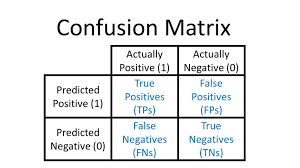

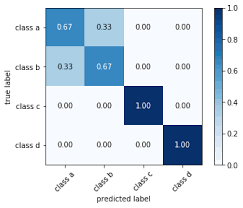

The results from the confusion matrix enable us to calculate different evaluation metrics for our classification problem.  These metrics include precision, recall, accuracy, and the F-1 score.

#### For more of an explanation of a confusion matrix, visit:
https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

See https://www.youtube.com/watch?v=8Oog7TXHvFY at 24:30 to learn about reading a confusion matrix for a multi-categorical classification model

In [42]:
# generate a multi-categorical confusion matrix (code adapted from lab dsc-3-27-08)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_hat_test)
cm

array([[22,  1,  0,  0,  1,  8, 10,  0,  2,  0],
       [ 0, 35,  0,  0,  0,  1,  1,  0,  0,  0],
       [ 4,  4, 21,  0,  1,  3,  2,  3,  2,  4],
       [ 3,  0,  0,  7,  1,  0, 10, 16,  4,  3],
       [ 1,  1,  2,  0, 18,  0,  9,  4,  4,  0],
       [ 4, 14,  4,  0,  0, 20,  1,  3,  0,  0],
       [ 0,  0,  1,  1,  0,  1, 29,  0,  1,  0],
       [ 0,  1,  0,  0,  2,  0,  0, 32,  2,  0],
       [ 1,  5,  2,  0,  7,  2,  4,  1, 11,  0],
       [ 6,  3,  4,  1,  0,  2, 15,  8,  2,  2]])

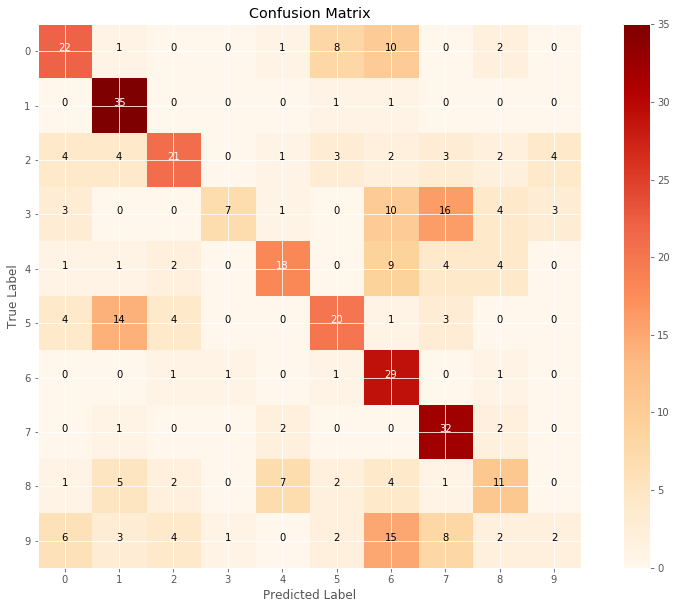

In [43]:
# visualize the confusion matrix

import numpy as np
import itertools
import matplotlib.pyplot as plt
% matplotlib inline

def show_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(15,10))  # added to change figure size
    plt.imshow(cf, cmap=plt.cm.OrRd)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

show_cf(y_test, y_hat_test)

Ideally, the diagonal of this matrix would be shaded darker than the areas above or below it. This would mean that the true label was predicted correctly the majority of the time. Looking at the diagonal, we can see that genres 1 & 7 were correctly classified the most, whereas genres 3, 8 & 9 were classified incorrectly the most.

### Step 7:  Calculate Evaluation Metrics

In [44]:
from sklearn.metrics import classification_report, accuracy_score

In [45]:
print (classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.54      0.50      0.52        44
           1       0.55      0.95      0.69        37
           2       0.62      0.48      0.54        44
           3       0.78      0.16      0.26        44
           4       0.60      0.46      0.52        39
           5       0.54      0.43      0.48        46
           6       0.36      0.88      0.51        33
           7       0.48      0.86      0.62        37
           8       0.39      0.33      0.36        33
           9       0.22      0.05      0.08        43

   micro avg       0.49      0.49      0.49       400
   macro avg       0.51      0.51      0.46       400
weighted avg       0.51      0.49      0.45       400



In [46]:
print ('Accuracy Score:', accuracy_score(y_test, y_hat_test))

Accuracy Score: 0.4925


The F1-score penalizes models heavily if it skews too hard towards either precision or recall. For this reason, F1-score is generally the most used metric for describing the performance of a model.

Music can often cross over into more than one genre, for this reason, accuracy may not be the best metric to use to evaluate the model.

### Which Metric to Use?
The metrics that are most important to a project will often be dependent on the business use or goals for that model. 
In general, it is a good idea to calculate any and all relevant metrics. In most classification tasks, you don't know which model will perform best when you start. The common workflow is to train each different type of classifier, and select the best by comparing the performance of each. It's common to make tables like the one below, and highlight the best peformer for each metric:

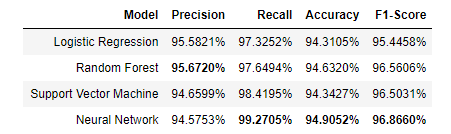

The above taken from Mod3 Section27 Evaluation Metrics lesson

Overall, the logistical regresson model performed fair at best.  It did better with some genres than others but choosing a deep learning model should produce a better result.

## II.  Deep Learning Model

### K-Fold Cross Validation

K-Fold Cross Validation expands on the idea of training and testing splits by splitting the entire dataset into {K} equal sections of data. We'll then iteratively train {K} linear regression models on the data, with each linear model using a different section of data as the testing set, and all other sections combined as the training set.

We can then average the individual results from each of these linear models to get a Cross-Validation MSE. This will be closer to the model's actual MSE, since "noisy" results that are higher than average will cancel out the "noisy" results that are lower than average.

(Information taken from Mod1 Section11 Introduction to Cross Validation)

In [47]:
# the following keras code is adapted from https://www.kaggle.com/chadwickcasper/deep-music

# Split the data into 10 different folds, each containing the whole set
# The folds contain two parts:
# index:0 the larger (9/10's) piece - (the features)
# index:1 the smaller (1/10's) piece - (the label)

from sklearn.model_selection import StratifiedKFold
import random

folds = 10
random_state = random_state = random.randint(1, 65536)
cv = StratifiedKFold(n_splits=folds,
                     shuffle=True,
                     random_state=random_state,
                     )

kfold_data = list(cv.split(features_data, data['label']))


### Building a Keras Model
Information adapted from Mod4 Section41 - Introduction to keras

In [48]:
#  import keras libraries

from tensorflow import keras
from keras import models
from keras import layers
from keras import optimizers

Using TensorFlow backend.


### Deciding on the network architecture

The type of network used to build the model needs to be defined. For this case, the sequential architecture will be used which builds one layer upon the previous one.

model = models.Sequential()

### Adding layers
Once we have initialized a network object, we can then add layers to the network which includes the number of layers we wish to add, as well as which activiation function to use. Sigmoid and ReLu are examples of activation functions.

The Dense method indicates that this layer will be fully connected. 

Finally, the input_shape parameter is often optional. That is, in successive layers, Keras implies the required shape of the layer to be added based on the shape of the previous layer.

In [49]:
model = models.Sequential([
    layers.Dense(28, activation='relu'),
    layers.Dense(19, activation='relu'),
    layers.Dense(10, activation='softmax')
])

W1129 12:32:42.807538 4441437632 deprecation_wrapper.py:119] From /Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



### Compiling the model

Once we have defined the network architecture and added layers to that network, we then compile the model before training that model on our data.  

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',
              metrics=['accuracy'])

Notice that this is also where the loss function is defined.

In [50]:
# Compile the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

W1129 12:32:42.887796 4441437632 deprecation_wrapper.py:119] From /Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



### test run with the first fold:

In [51]:
# Let's start with the first fold of data just to see that everything works

first_fold = kfold_data[0]
train_indices, test_indices = first_fold[0], first_fold[1]

train_data = norm_df.iloc[train_indices]
train_labels = data['label'].iloc[train_indices]

test_data = norm_df.iloc[test_indices]
test_labels = data['label'].iloc[test_indices]

### Training the model

history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Here's some further notes regarding these terms from the Keras documentation FAQ:


* **Sample**: one element of a dataset.  
    * *Example*: one image is a sample in a convolutional network  
    * *Example*: one audio file is a sample for a speech recognition model  
    
* **Batch**: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.  
* A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* **Epoch**: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).


In [52]:
# Train the model
history = model.fit(train_data.values, train_labels.values, epochs=150)

W1129 12:32:42.975094 4441437632 deprecation_wrapper.py:119] From /Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1129 12:32:42.980954 4441437632 deprecation_wrapper.py:119] From /Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1129 12:32:43.084720 4441437632 deprecation_wrapper.py:119] From /Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W1129 12:32:43.204488 4441437632 deprecation.py:323] From /Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.p

Epoch 1/150
900/900 [==============================] - 0s 447us/step - loss: 2.3173 - acc: 0.1422
Epoch 2/150
900/900 [==============================] - 0s 74us/step - loss: 2.1358 - acc: 0.2578
Epoch 3/150
900/900 [==============================] - 0s 57us/step - loss: 1.9862 - acc: 0.3278
Epoch 4/150
900/900 [==============================] - 0s 109us/step - loss: 1.8402 - acc: 0.3733
Epoch 5/150
900/900 [==============================] - 0s 56us/step - loss: 1.7172 - acc: 0.4011
Epoch 6/150
900/900 [==============================] - 0s 55us/step - loss: 1.6170 - acc: 0.4156
Epoch 7/150
900/900 [==============================] - 0s 66us/step - loss: 1.5407 - acc: 0.4422
Epoch 8/150
900/900 [==============================] - 0s 73us/step - loss: 1.4775 - acc: 0.4767
Epoch 9/150
900/900 [==============================] - 0s 55us/step - loss: 1.4209 - acc: 0.4944
Epoch 10/150
900/900 [==============================] - 0s 55us/step - loss: 1.3713 - acc: 0.5078
Epoch 11/150
900/900 [=====

900/900 [==============================] - 0s 49us/step - loss: 0.5015 - acc: 0.8344
Epoch 85/150
900/900 [==============================] - 0s 54us/step - loss: 0.4951 - acc: 0.8333
Epoch 86/150
900/900 [==============================] - 0s 55us/step - loss: 0.4898 - acc: 0.8389
Epoch 87/150
900/900 [==============================] - 0s 65us/step - loss: 0.4885 - acc: 0.8333
Epoch 88/150
900/900 [==============================] - 0s 58us/step - loss: 0.4841 - acc: 0.8333
Epoch 89/150
900/900 [==============================] - 0s 48us/step - loss: 0.4904 - acc: 0.8267
Epoch 90/150
900/900 [==============================] - 0s 50us/step - loss: 0.4732 - acc: 0.8389
Epoch 91/150
900/900 [==============================] - 0s 50us/step - loss: 0.4702 - acc: 0.8378
Epoch 92/150
900/900 [==============================] - 0s 51us/step - loss: 0.4641 - acc: 0.8478
Epoch 93/150
900/900 [==============================] - 0s 47us/step - loss: 0.4601 - acc: 0.8533
Epoch 94/150
900/900 [===========

In [53]:
# print the loss and accuracy for the first fold training data

model.evaluate(train_data.values, train_labels.values)

900/900 [==============================] - 0s 76us/step


[0.2755958010090722, 0.9288888888888889]

In [54]:
# print the accuracy for the first fold testing data

model.evaluate(test_data.values, test_labels.values)

100/100 [==============================] - 0s 90us/step


[1.6540794944763184, 0.58]

The following code is an alternative to the code box above

test_loss, test_acc = model.evaluate(test_data.values, test_labels.values)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss

### graph the results for fold one

dict_keys(['loss', 'acc'])


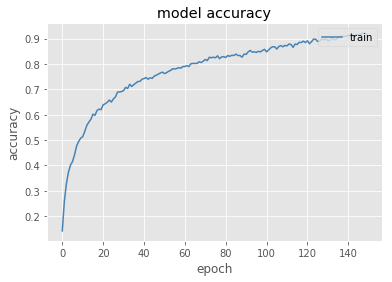

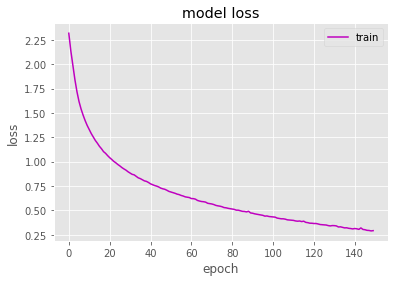

In [55]:
# print the labels of the history contents:
print(history.history.keys())

# graph the results for the one fold model
# summarize history for accuracy
plt.plot(history.history['acc'], color = 'steelblue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], color = 'm')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

## now train the model using all the folds:
Train the model on the k folds. See what kind of profiles the loss and accuracy curves take¶

W1129 12:32:52.249428 4441437632 deprecation.py:506] From /Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Training on fold 0 ...
Training on fold 1 ...
Training on fold 2 ...
Training on fold 3 ...
Training on fold 4 ...
Training on fold 5 ...
Training on fold 6 ...
Training on fold 7 ...
Training on fold 8 ...
Training on fold 9 ...


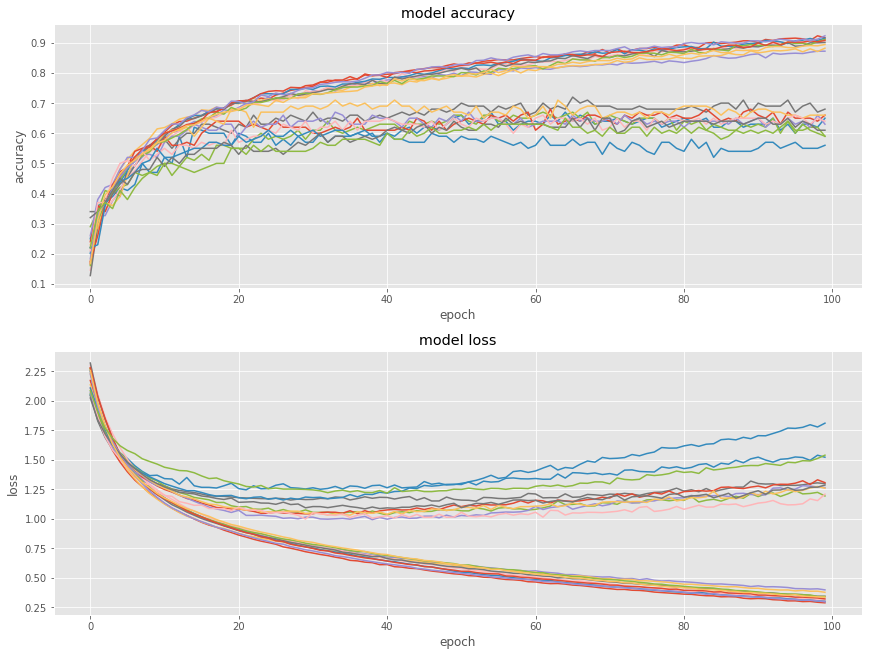

In [56]:
fig, axs = plt.subplots(2,1, figsize=(12,9), constrained_layout=True)

for i, fold_ind in enumerate(kfold_data[:]):
    print('Training on fold {} ...'.format(i))
    train_indices, test_indices = fold_ind[0], fold_ind[1]
    train_data = norm_df.iloc[train_indices]
    train_labels = data['label'].iloc[train_indices]
    test_data = norm_df.iloc[test_indices]
    test_labels = data['label'].iloc[test_indices]
    
    model = keras.Sequential([
        keras.layers.Dense(28, activation='relu'),
        keras.layers.Dense(19, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(train_data.values,
                        train_labels.values,
                        epochs=100,
                        batch_size=16,
                        validation_data=(test_data.values, test_labels.values),
                        verbose=0
                       )
    
    # summarize history for accuracy
    axs[0].plot(history.history['acc'], label='acc_'+str(i))
    axs[0].plot(history.history['val_acc'], label='val_acc_'+str(i))

    # summarize history for loss
    axs[1].plot(history.history['loss'], label='loss_'+str(i))
    axs[1].plot(history.history['val_loss'], label='val_loss_'+str(i))

axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].grid(True, which='major')
# axs[0].legend(loc='upper left')

axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].grid(True, which='major')
# axs[1].legend(loc='upper left')

In [57]:
# print the loss and accuracy for the training data

model.evaluate(train_data.values, train_labels.values)

900/900 [==============================] - 0s 132us/sample - loss: 0.3202 - acc: 0.9033


[0.320194174779786, 0.9033333]

In [58]:
# print the accuracy for the testing data

model.evaluate(test_data.values, test_labels.values)

100/100 [==============================] - 0s 97us/sample - loss: 1.5381 - acc: 0.5900


[1.5381449794769286, 0.59]

We can see a gap forming between the accuracy and the loss of the different folds after 20 epochs.

#### Let's try to use regularization & dropout and see if that gives us better results

Training on fold 0 ...
Training on fold 1 ...
Training on fold 2 ...
Training on fold 3 ...
Training on fold 4 ...
Training on fold 5 ...
Training on fold 6 ...
Training on fold 7 ...
Training on fold 8 ...
Training on fold 9 ...
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
Test Accuracy =  [0.28, 0.35, 0.36, 0.34, 0.35, 0.38, 0.41, 0.41, 0.44, 0.48, 0.49, 0.54, 0.55, 0.54, 0.54, 0.54, 0.55, 0.52, 0.57, 0.55, 0.54, 0.54, 0.55, 0.56, 0.52, 0.54, 0.56, 0.57, 0.55, 0.59, 0.58, 0.59, 0.59, 0.59, 0.59, 0.61, 0.61, 0.64, 0.63, 0.6, 0.6, 0.58, 0.58, 0.62, 0.61, 0.59, 0.61, 0.6, 0.62, 0.62, 0.63, 0.63, 0.61, 0.63, 0.66, 0.64, 0.66, 0.64, 0.62, 0.63, 0.64, 0.63, 0.66, 0.66, 0.64, 0.64, 0.65, 0.63, 0.64, 0.63, 0.62, 0.65, 0.62, 0.58, 0.64, 0.63, 0.63, 0.64, 0.66, 0.64, 0.62, 0.65, 0.62, 0.61, 0.61, 0.64, 0.64, 0.62, 0.61, 0.62, 0.63, 0.65, 0.62, 0.58, 0.66, 0.64, 0.65, 0.63, 0.64, 0.64]


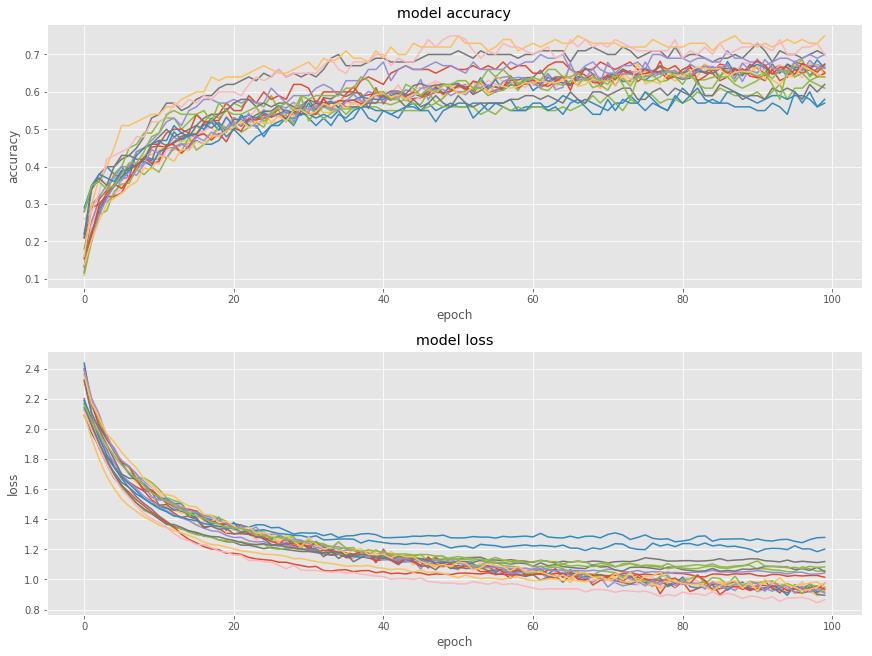

In [59]:
fig, axs = plt.subplots(2,1, figsize=(12,9), constrained_layout=True)

for i, fold_ind in enumerate(kfold_data[:]):
    print('Training on fold {} ...'.format(i))
    train_indices, test_indices = fold_ind[0], fold_ind[1]
    train_data = norm_df.iloc[train_indices]
    train_labels = data['label'].iloc[train_indices]
    test_data = norm_df.iloc[test_indices]
    test_labels = data['label'].iloc[test_indices]
    
    model = keras.Sequential([
        keras.layers.Dense(28, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(19, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(train_data.values,
                        train_labels.values,
                        epochs=100,
                        batch_size=16,
                        validation_data=(test_data.values, test_labels.values),
                        verbose=0
                       )

    # summarize history for accuracy
    axs[0].plot(history.history['acc'], label='acc_'+str(i))
    axs[0].plot(history.history['val_acc'], label='val_acc_'+str(i))

    # summarize history for loss
    axs[1].plot(history.history['loss'], label='loss_'+str(i))
    axs[1].plot(history.history['val_loss'], label='val_loss_'+str(i))

axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].grid(True, which='major')

axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].grid(True, which='major')

print(history.history.keys())
print('Test Accuracy = ', history.history['val_acc'])

In [60]:
# print the loss and accuracy for the training data

model.evaluate(train_data.values, train_labels.values)

900/900 [==============================] - 0s 124us/sample - loss: 0.6686 - acc: 0.7833


[0.6685961506101821, 0.78333336]

In [61]:
# print the accuracy for the testing data

test_loss, test_acc = model.evaluate(test_data.values, test_labels.values)

print('\nTest accuracy:', test_acc)

100/100 [==============================] - 0s 132us/sample - loss: 1.0838 - acc: 0.6400

Test accuracy: 0.64


The training accuracy went from 90% to 78% with the dropout, but the test accuracy improved from 59% to 64%.

#### See if performance can be improved if the model is trained longer:

Training on fold 0 ...
Training on fold 1 ...
Training on fold 2 ...
Training on fold 3 ...
Training on fold 4 ...
Training on fold 5 ...
Training on fold 6 ...
Training on fold 7 ...
Training on fold 8 ...
Training on fold 9 ...


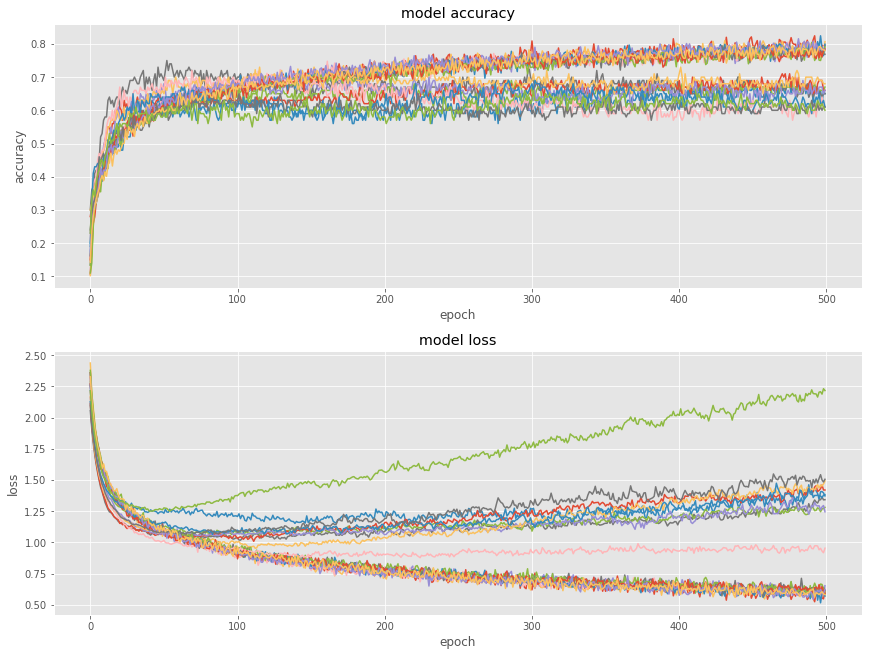

In [62]:
fig, axs = plt.subplots(2,1, figsize=(12,9), constrained_layout=True)

for i, fold_ind in enumerate(kfold_data[:]):
    print('Training on fold {} ...'.format(i))
    train_indices, test_indices = fold_ind[0], fold_ind[1]
    train_data = norm_df.iloc[train_indices]
    train_labels = data['label'].iloc[train_indices]
    test_data = norm_df.iloc[test_indices]
    test_labels = data['label'].iloc[test_indices]
    
    model = keras.Sequential([
        keras.layers.Dense(28, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(19, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(train_data.values,
                        train_labels.values,
                        epochs=500,
                        batch_size=16,
                        validation_data=(test_data.values, test_labels.values),
                        verbose=0
                       )
    
    # summarize history for accuracy
    axs[0].plot(history.history['acc'], label='acc_'+str(i))
    axs[0].plot(history.history['val_acc'], label='val_acc_'+str(i))

    # summarize history for loss
    axs[1].plot(history.history['loss'], label='loss_'+str(i))
    axs[1].plot(history.history['val_loss'], label='val_loss_'+str(i))

axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].grid(True, which='major')
# axs[0].legend(loc='upper left')

axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].grid(True, which='major')
# axs[1].legend(loc='upper left')

In [63]:
# print the loss and accuracy for the training data

model.evaluate(train_data.values, train_labels.values)

900/900 [==============================] - 0s 79us/sample - loss: 0.2889 - acc: 0.9244


[0.2889262076218923, 0.92444444]

In [64]:
# print the accuracy for the testing data

test_loss, test_acc = model.evaluate(test_data.values, test_labels.values)

print('\nTest accuracy:', test_acc)

100/100 [==============================] - 0s 85us/sample - loss: 2.2171 - acc: 0.6000

Test accuracy: 0.6


Increasing the training from 100 to 500 epochs did improve the training performance from the model with regularization and dropout, from 78% to 92%, but the test accuracy decreased from 64% to 60%.  So we probably want to stick with the 100 epoch model.

### Graph Summary for Training Data:

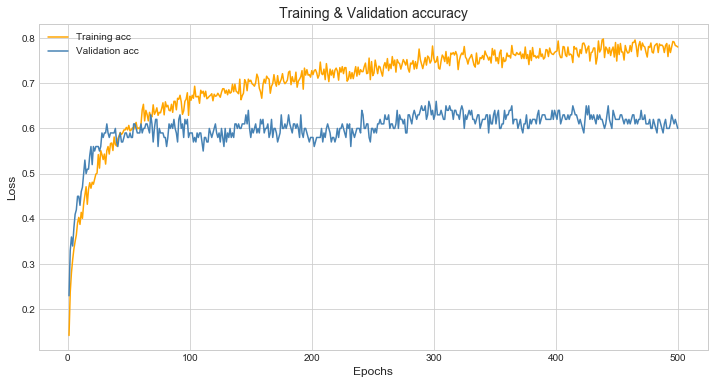

In [65]:
# https://github.com/arseniyturin/dsc-4-final-project-online-ds-sp-000/blob/master/student.ipynb

epochs = range(1, len(history.history['acc']) + 1)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history.history['acc'], 'orange', label='Training acc')
plt.plot(epochs, history.history['val_acc'], 'steelblue', label='Validation acc')
plt.title('Training & Validation accuracy', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

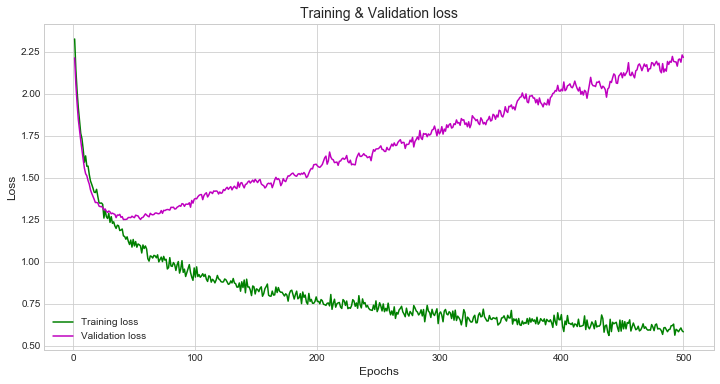

In [66]:
# https://github.com/arseniyturin/dsc-4-final-project-online-ds-sp-000/blob/master/student.ipynb

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history.history['loss'], 'g', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'm', label='Validation loss')

plt.title('Training & Validation loss',fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Making Predictions

As with sci-kit learn and other prebuilt packages, making predictions from a trained model is relatively straightforward. To do this, you can simply use the `predict` method built into the model object. For example:  
```{python}
y_hat = model.predict(x)
```

In [67]:
y_hat = model.predict(X)
y_hat

array([[3.5863823e-01, 2.5250753e-07, 1.5694005e-02, ..., 1.2795466e-06,
        3.1631548e-04, 3.9750677e-01],
       [9.8281819e-01, 7.3418860e-08, 6.6927588e-03, ..., 1.2308296e-11,
        3.1732561e-06, 9.4888210e-03],
       [9.9988306e-01, 4.0824453e-18, 3.4994559e-06, ..., 2.0415904e-19,
        3.7355194e-09, 1.1344202e-04],
       ...,
       [5.5145490e-01, 1.2389012e-14, 2.9546218e-03, ..., 6.7852658e-15,
        5.5988041e-09, 4.4156694e-01],
       [1.9892141e-01, 6.0290704e-06, 2.2462976e-01, ..., 7.6852345e-08,
        4.0363335e-05, 5.6692868e-01],
       [8.3764652e-03, 1.3355199e-02, 4.4886898e-03, ..., 4.6831087e-04,
        1.5676057e-02, 5.9297007e-01]], dtype=float32)

## Evaluating the Model

Now that the model has been trained, our predictions are applying that model to the data. Similarly, we can use the `evaluate` method in order to compute the loss and other specified metrics for our trained model.

For example,   

```model.evaluate(X_train, X_train_labels)``` will return the final loss associated with the model for the training data as well as any other metrics that were specified during compilation.

Similarly, 

```model.evaluate(X_test, X_test_labels)``` will return the final loss associated with the model for the test data as well as any other specified metrics.


In [68]:
# final evaluation for the training data

model.evaluate(train_data.values, train_labels.values)

900/900 [==============================] - 0s 54us/sample - loss: 0.2889 - acc: 0.9244


[0.2889262076218923, 0.92444444]

In [69]:
# final evaluation for the testing data
model.evaluate(test_data.values, test_labels.values)

100/100 [==============================] - 0s 85us/sample - loss: 2.2171 - acc: 0.6000


[2.217117705345154, 0.6]

## Conclusion:

The model at 100 epochs achieved a 67% accuracy with the test data.  Training the data longer with 500 epochs produced a little better result with a 71% accuracy on the testing data.

# Work for Further Consideration

Experimenting more with the values of the hyper parameters could produce better results.
I would also like to investigate more features that help to distinguish one genre from another.  This may help improve the performance of the model.  